# Lab 10 MNIST and Softmax

## Lab10-7-mnist_nn_higher_level_API

In [1]:
from tensorflow.contrib.layers import fully_connected, batch_norm, dropout
from tensorflow.contrib.framework import arg_scope
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
tf.set_random_seed(777)  # reproducibility

In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
# parameters
learning_rate = 0.01  # we can use large learning rate using Batch Normalization
training_epochs = 15
batch_size = 100
keep_prob = 0.7

In [5]:
# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])
train_mode = tf.placeholder(tf.bool, name='train_mode')

In [6]:
# layer output size
hidden_output_size = 512
final_output_size = 10

In [7]:
xavier_init = tf.contrib.layers.xavier_initializer()
bn_params = {
    'is_training': train_mode,
    'decay': 0.9,
    'updates_collections': None
}

In [8]:
# We can build short code using 'arg_scope' to avoid duplicate code
# same function with different arguments
with arg_scope([fully_connected],
               activation_fn=tf.nn.relu,
               weights_initializer=xavier_init,
               biases_initializer=None,
               normalizer_fn=batch_norm,
               normalizer_params=bn_params
               ):
    hidden_layer1 = fully_connected(X, hidden_output_size, scope="h1")
    h1_drop = dropout(hidden_layer1, keep_prob, is_training=train_mode)
    hidden_layer2 = fully_connected(h1_drop, hidden_output_size, scope="h2")
    h2_drop = dropout(hidden_layer2, keep_prob, is_training=train_mode)
    hidden_layer3 = fully_connected(h2_drop, hidden_output_size, scope="h3")
    h3_drop = dropout(hidden_layer3, keep_prob, is_training=train_mode)
    hidden_layer4 = fully_connected(h3_drop, hidden_output_size, scope="h4")
    h4_drop = dropout(hidden_layer4, keep_prob, is_training=train_mode)
    hypothesis = fully_connected(h4_drop, final_output_size, activation_fn=None, scope="hypothesis")

In [9]:
# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [10]:
# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [11]:
# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict_train = {X: batch_xs, Y: batch_ys, train_mode: True}
        feed_dict_cost = {X: batch_xs, Y: batch_ys, train_mode: False}
        opt = sess.run(optimizer, feed_dict=feed_dict_train)
        c = sess.run(cost, feed_dict=feed_dict_cost)
        avg_cost += c / total_batch

    print("[Epoch: {:>4}] cost = {:>.9}".format(epoch + 1, avg_cost))
    #print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

[Epoch:    1] cost = 0.382780868
[Epoch:    2] cost = 0.330968508
[Epoch:    3] cost = 0.32185967
[Epoch:    4] cost = 0.315274022
[Epoch:    5] cost = 0.311545199
[Epoch:    6] cost = 0.310111493
[Epoch:    7] cost = 0.307930431
[Epoch:    8] cost = 0.307182975
[Epoch:    9] cost = 0.305391376
[Epoch:   10] cost = 0.304477239
[Epoch:   11] cost = 0.303453268
[Epoch:   12] cost = 0.301850721
[Epoch:   13] cost = 0.301658836
[Epoch:   14] cost = 0.301292971
[Epoch:   15] cost = 0.302490956
Learning Finished!


In [12]:
# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels, train_mode: False}))

Accuracy: 0.9844


In [13]:
# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1], train_mode: False}))

Label:  [3]
Prediction:  [3]


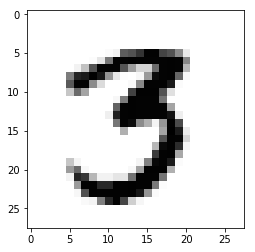

'\n[Epoch:    1] cost = 0.519417209\n[Epoch:    2] cost = 0.432551052\n[Epoch:    3] cost = 0.404978843\n[Epoch:    4] cost = 0.392039919\n[Epoch:    5] cost = 0.382165317\n[Epoch:    6] cost = 0.377987834\n[Epoch:    7] cost = 0.372577601\n[Epoch:    8] cost = 0.367208552\n[Epoch:    9] cost = 0.365525589\n[Epoch:   10] cost = 0.361964276\n[Epoch:   11] cost = 0.359540287\n[Epoch:   12] cost = 0.356423751\n[Epoch:   13] cost = 0.354478216\n[Epoch:   14] cost = 0.353212552\n[Epoch:   15] cost = 0.35230893\nLearning Finished!\nAccuracy: 0.9826\n'

In [14]:
plt.imshow(mnist.test.images[r:r + 1].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

'''
[Epoch:    1] cost = 0.519417209
[Epoch:    2] cost = 0.432551052
[Epoch:    3] cost = 0.404978843
[Epoch:    4] cost = 0.392039919
[Epoch:    5] cost = 0.382165317
[Epoch:    6] cost = 0.377987834
[Epoch:    7] cost = 0.372577601
[Epoch:    8] cost = 0.367208552
[Epoch:    9] cost = 0.365525589
[Epoch:   10] cost = 0.361964276
[Epoch:   11] cost = 0.359540287
[Epoch:   12] cost = 0.356423751
[Epoch:   13] cost = 0.354478216
[Epoch:   14] cost = 0.353212552
[Epoch:   15] cost = 0.35230893
Learning Finished!
Accuracy: 0.9826
'''
